<a href="https://colab.research.google.com/github/AketzalliG/docs/blob/master/L05_Red_Neuronal_Densa_TF_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RED NEURONAL DENSA**
# Loan Prediction

**PASO 1.-** Importar las librerias

In [4]:
# Paqueteía básica
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow y Keras
import tensorflow as tf
from tensorflow import keras

# Funcionalidades básicas de Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

**PASO 2.-** Descargar el archivo y cargar los datos

In [5]:
!wget 'https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/loan_prediction.csv'

--2025-10-04 13:45:53--  https://github.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/raw/main/Datasets/loan_prediction.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/loan_prediction.csv [following]
--2025-10-04 13:45:53--  https://raw.githubusercontent.com/Dr-Carlos-Villasenor/Clase_Aprendizaje_Profundo/main/Datasets/loan_prediction.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17516 (17K) [text/plain]
Saving to: ‘loan_prediction.csv.1’

loan_prediction.csv 100%[===================>]  17.11K  --.-KB/s    in 0s      


In [6]:
dataset = pd.read_csv('loan_prediction.csv')
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


**PASO 3.-** Limpieza de datos y codificación

In [9]:
# Inspección inicial y manejo de valores faltantes
dataset.info()

# Manejo de los valores faltantes
dataset.isnull().sum()

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
  dataset[col].fillna(dataset[col].mean(), inplace=True)

dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

dataset.isnull().sum().max()

dataset['Loan_Status'] = dataset['Loan_Status'].astype(int)

dataset.info()
dataset.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 28.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   Loan_Status     

/tmp/ipython-input-1898207786.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mean(), inplace=True)
/tmp/ipython-input-1898207786.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


**PASO 4.-** Elegir las variables de entrada y salida

In [11]:
# La variable de salida (y) es la variable de interés (Loan_Status)
y = dataset[['Loan_Status']]

# Las variables de entrada (X) son las demás variables
x = dataset.drop(columns=['Loan_Status'])

print(x.shape)
print(y.shape)

(614, 5)
(614, 1)


**PASO 5.-** Normalizar y particionar el conjunto de datos

In [12]:
# Normalización de los datos de entrada (x)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Partición del conjunto de datos
x_train, x_test, y_train, y_test = train_test_split(x_normalized,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print(x_train.shape)
print(x_test.shape)

(491, 5)
(123, 5)


**PASO 6.-** Diseñar una red neuronal

In [13]:
def build_model():
  model = keras.Sequential()

  # Capa de entrada y primera capa oculta
  model.add(keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(keras.layers.Dropout(0.2))

  # Segunda capa oculta
  model.add(keras.layers.Dense(32, activation='relu'))

  # Capa de salida para Clasificacion
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Compilar el modelo
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

  return model

model = build_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

**PASO 7.-** Entrenar la red neuronal y dibujar las graficas de evolución de entrenamiento

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3906 - loss: 0.7267 - val_accuracy: 0.7642 - val_loss: 0.6450
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6767 - loss: 0.6702 - val_accuracy: 0.7642 - val_loss: 0.5993
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7710 - loss: 0.5999 - val_accuracy: 0.7724 - val_loss: 0.5622
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7579 - loss: 0.5777 - val_accuracy: 0.7886 - val_loss: 0.5408
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7877 - loss: 0.5436 - val_accuracy: 0.7886 - val_loss: 0.5285
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7879 - loss: 0.5110 - val_accuracy: 0.7886 - val_loss: 0.5198
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7580 - loss: 0.5550 - val_accuracy: 0.7967 - val_loss: 0.5180
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7567 - loss: 0.5578 - val_accuracy: 0.7967 - 

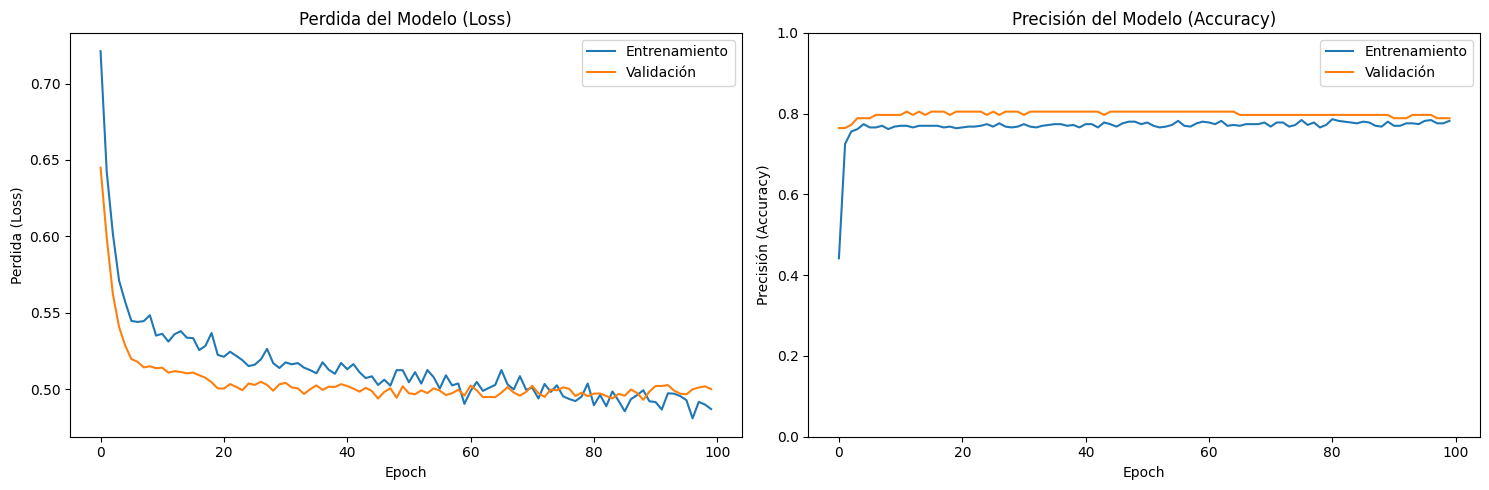

In [15]:
# Entrenar el modelo
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Dibujar las curvas de aprendizaje
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(15, 5))

  # Grafico de la perdida (loss)
  plt.subplot(1, 2, 1)
  plt.title('Perdida del Modelo (Loss)')
  plt.xlabel('Epoch')
  plt.ylabel('Perdida (Loss)')
  plt.plot(hist['epoch'], hist['loss'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_loss'], label='Validación')
  plt.legend()

  # Grafico de la Precisión (Accuracy)
  plt.subplot(1, 2, 2)
  plt.title('Precisión del Modelo (Accuracy)')
  plt.xlabel('Epoch')
  plt.ylabel('Precisión (Accuracy)')
  plt.plot(hist['epoch'], hist['accuracy'], label='Entrenamiento')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='Validación')
  plt.legend()
  plt.ylim([0, 1])

  plt.tight_layout()
  plt.show()

plot_history(history)


**PASO 8.-** Implementación de Early Stopping como regulador

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6285 - loss: 0.6964 - val_accuracy: 0.7317 - val_loss: 0.6327
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7250 - loss: 0.6199 - val_accuracy: 0.7724 - val_loss: 0.5796
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7435 - loss: 0.5844 - val_accuracy: 0.7967 - val_loss: 0.5449
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.5541 - val_accuracy: 0.7967 - val_loss: 0.5250
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7434 - loss: 0.5626 - val_accuracy: 0.7967 - val_loss: 0.5173
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7690 - loss: 0.5287 - val_accuracy: 0.7967 - val_loss: 0.5133
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7948 - loss: 0.5104 - val_accuracy: 0.7967 - val_loss: 0.5114
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7825 - loss: 0.5197 - val_accuracy: 0.7967 - val_l

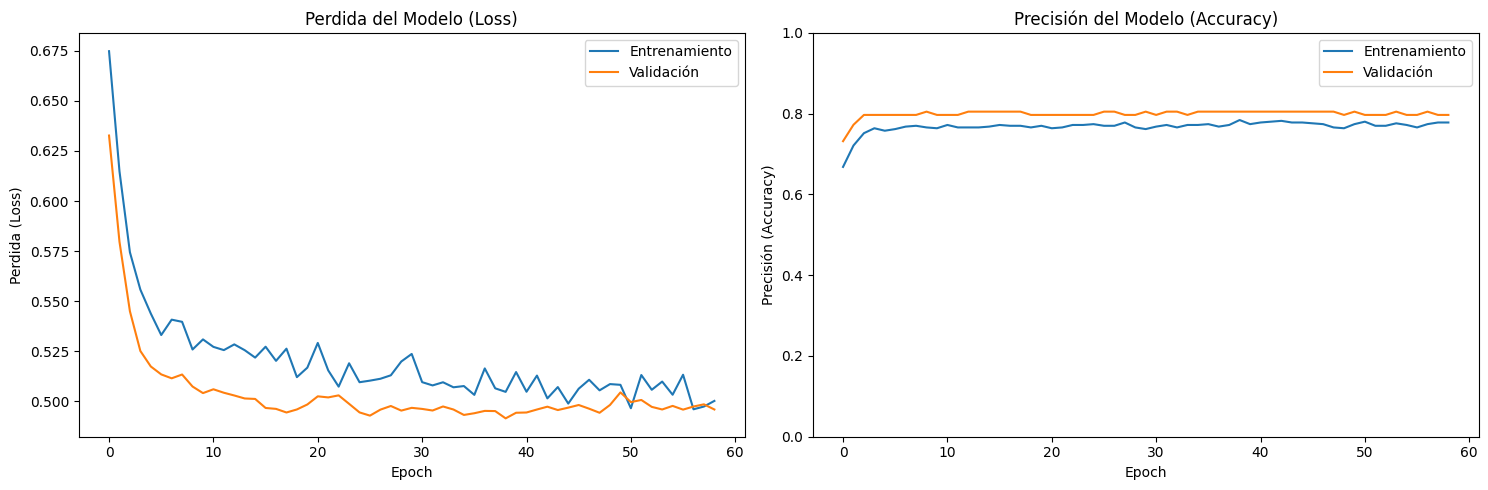

In [17]:
# Crear la instancia de EarlyStopping
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=20,
                                   verbose=1,
                                   restore_best_weights=True)

# Construir el modelo optimizado
model_optimized = build_model()

# Entrenar el modelo optimizado
history_opt = model_optimized.fit(x_train,
                                  y_train,
                                  epochs=1000,
                                  batch_size=32,
                                  validation_data=(x_test, y_test),
                                  callbacks=[es],
                                  verbose=1)

plot_history(history_opt)

**PASO 9.-** Cálculo de Métricas

In [19]:
# Importar las librerias necesarias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = model_optimized.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Extraer las etiquetas verdaderas del conjunto de prueba
y_true = np.asanyarray(y_test)

# Calcular la Matriz de Confusión
cm = confusion_matrix(y_true, y_pred_classes)
print("Matriz de Confusión:")
print(cm)

# Calcular y mostrar las métricas de desempeño
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes)
recall = recall_score(y_true, y_pred_classes)
f1 = f1_score(y_true, y_pred_classes)

print(f"\nPrecisión Global (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision) : {precision:.4f}")
print(f"Sensibilidad (Recall) : {recall:.4f}")
print(f"Puntaje F1 (F1-Score): {f1:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Matriz de Confusión:
[[22 16]
 [ 8 77]]

Precisión Global (Accuracy): 0.8049
Precisión (Precision) : 0.8280
Sensibilidad (Recall) : 0.9059
Puntaje F1 (F1-Score): 0.8652
